In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data=pd.read_csv(url)

In [49]:
data = data.as_matrix()

In [50]:
X=data[:,0:8]
y=data[:,8]

In [51]:
models= []
models.append(("KNN",KNeighborsClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

In [52]:
results = []
names = []

In [53]:
for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    v = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(v)
    names.append(name)
    print(name)
    print(v)

KNN
[ 0.64935065  0.83116883  0.68831169  0.63636364  0.72727273  0.75324675
  0.74025974  0.81578947  0.68421053  0.75      ]
LR
[ 0.7012987   0.80519481  0.74025974  0.68831169  0.79220779  0.75324675
  0.84415584  0.81578947  0.72368421  0.80263158]
DT
[ 0.67532468  0.79220779  0.64935065  0.58441558  0.7012987   0.7012987
  0.72727273  0.80263158  0.67105263  0.68421053]
NB
[ 0.67532468  0.80519481  0.75324675  0.71428571  0.72727273  0.76623377
  0.80519481  0.81578947  0.73684211  0.75      ]
SVM
[ 0.5974026   0.7012987   0.55844156  0.61038961  0.66233766  0.61038961
  0.80519481  0.68421053  0.68421053  0.60526316]


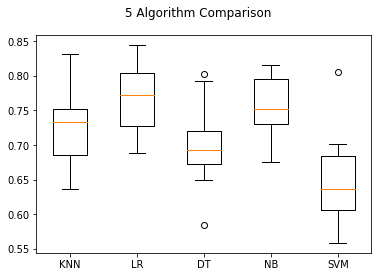

In [54]:
fig = plt.figure()
fig.suptitle('5 Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()